<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modules-for-this-notebook" data-toc-modified-id="Modules-for-this-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modules for this notebook</a></span></li><li><span><a href="#Our-small-affiliation-network" data-toc-modified-id="Our-small-affiliation-network-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Our small affiliation network</a></span></li><li><span><a href="#Bipartite-graphs-in-networkx" data-toc-modified-id="Bipartite-graphs-in-networkx-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bipartite graphs in <code>networkx</code></a></span><ul class="toc-item"><li><span><a href="#Drawing" data-toc-modified-id="Drawing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Drawing</a></span></li><li><span><a href="#2-colouring" data-toc-modified-id="2-colouring-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2-colouring</a></span></li></ul></li><li><span><a href="#Adjacency-Matrices" data-toc-modified-id="Adjacency-Matrices-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Adjacency Matrices</a></span><ul class="toc-item"><li><span><a href="#The-Biadjacency-Matrix" data-toc-modified-id="The-Biadjacency-Matrix-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Biadjacency Matrix</a></span></li></ul></li><li><span><a href="#Projections" data-toc-modified-id="Projections-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Projections</a></span></li></ul></div>

# CS4423-Networks : Lecture 8 [$\color{red}{\text{DRAFT}}$]
# Colourings and Computations
Niall Madden, 
School of Mathematical and Statistical Sciences  
University of Galway


This Jupyter notebook, and PDF and HTML versions, can be found at https://www.niallmadden.ie/2425-CS4423/#Week04

<div class="rc"><font size="-1"><em>This notebook was written by Niall Madden, adapted from notebooks by Angela Carnevale.</em></div>

## Modules for this notebook
Today, we'll default to lime-coloured nodes. For more options, see https://xkcd.com/color/rgb/

In [1]:
import networkx as nx
import numpy as np
opts = { "with_labels": True, "node_color": 'xkcd:lime' } # show labels; lime noodes

## Our small affiliation network

We built an affiliation  network based on data you provided. The network had two types of nodes:
* People (usually referred to as *Actors*)
* Programmes (here a programme is an example of a *focus*; so these nodes are _foci_).

We took a subgraph with just 7 people. The data for that is in a file called `CS4423-7.txt.`

In [2]:
!cat CS4423-7.txt

Fionn BB 
Rhea BB NightAgent Cake?
Rory BB Penguin Squid Bear NightAgent 
Bruno Squid
JackA BB Squid Bear Boys NightAgent BCS
Sam OMitB Squid Boys Cake? NightAgent
Andrew BB Squid BCS


We can easily build a network from this file, and draw it:

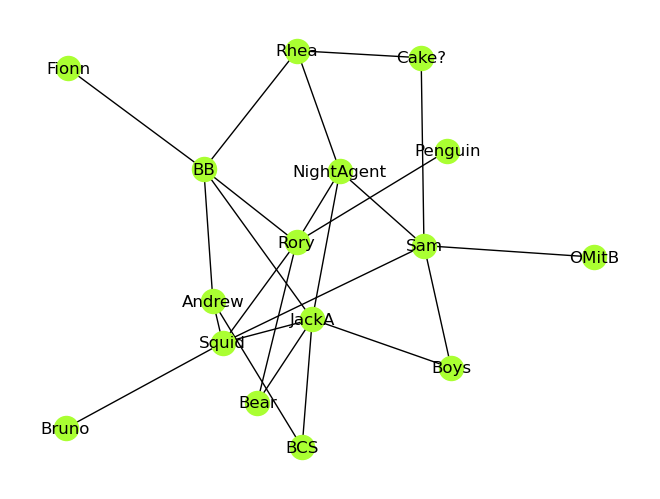

In [3]:
G7 = nx.read_adjlist('CS4423-7.txt')
nx.draw(G7, **opts)

Let's check the graphs basic properties:

In [4]:
print(f"G7 is {G7.order()} nodes and {G7.size()} edges")

G7 is 16 nodes and 24 edges


Unfortunately, this graph can be a little tricky to work with, unless we change it a little. This is not least because `networkx` does not automatically order the nodes the way we would like. In this example, here is how they are ordered:

In [5]:
print(list(G7.nodes()))

['Fionn', 'BB', 'Rhea', 'NightAgent', 'Cake?', 'Rory', 'Penguin', 'Squid', 'Bear', 'Bruno', 'JackA', 'Boys', 'BCS', 'Sam', 'OMitB', 'Andrew']


We can see that Nodes 0, 2, 5, 9, 10, 13 and 15 are the "people" nodes. We could build a permutation matrix from this, but will leave that for another time.

## Bipartite graphs in `networkx`
Since affiliation networks (and, more generally, bipartite graphs) are so important in Network Theory, `networkx` comes with various tools for  working with them.

In fact, `networkx` comes with sub-module, `bipartite` for  working with these graphs.

For example, it has a tool for verifying that a graph is, indeed, bipartite:

In [6]:
print(f"G7 is bipartite: {nx.bipartite.is_bipartite(G7)}")
K33 = nx.complete_bipartite_graph(3,3)
K5 = nx.complete_graph(5)
print(f"K33 is bipartite: {nx.bipartite.is_bipartite(K33)}")
print(f"K5 is bipartite: {nx.bipartite.is_bipartite(K5)}")

G7 is bipartite: True
K33 is bipartite: True
K5 is bipartite: False


One of the key methods is the `sets` function, which tries to compute the parts of the graph, which it returns as a `tuple`:

In [7]:
top, bottom = nx.bipartite.sets(G7)
print(f"Set 1: {top}")
print(f"Set 2: {bottom}")

Set 1: {'Fionn', 'Rhea', 'Sam', 'JackA', 'Rory', 'Andrew', 'Bruno'}
Set 2: {'BCS', 'BB', 'NightAgent', 'Boys', 'Cake?', 'OMitB', 'Bear', 'Penguin', 'Squid'}


Since we can see that Set 1 represents the people, and Set 2 the programmes, let's give them suitable names: 

In [8]:
Actors = top; Foci = bottom;

### Drawing
We can use this information, for example, to compute good positions for drawing the graph:

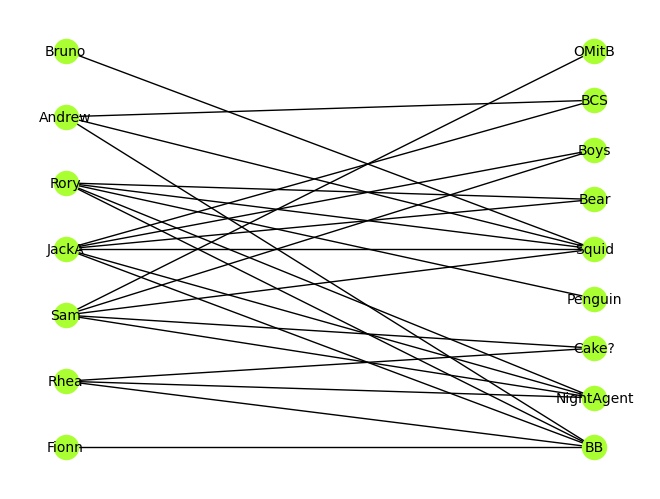

In [9]:
positions = nx.bipartite_layout(G7, Actors) # compute the positions
nx.draw(G7, **opts, font_size=10, pos=positions)

### 2-colouring 
We'll use this to make the *node colouring* which is a list of colours, corresponding the the list of nodes.

In [10]:
Nodes = list(G7.nodes())
G7_colours = ['b' if node in top else 'r' for node in Nodes]
print(G7_colours)

['b', 'r', 'b', 'r', 'r', 'b', 'r', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'r', 'b']


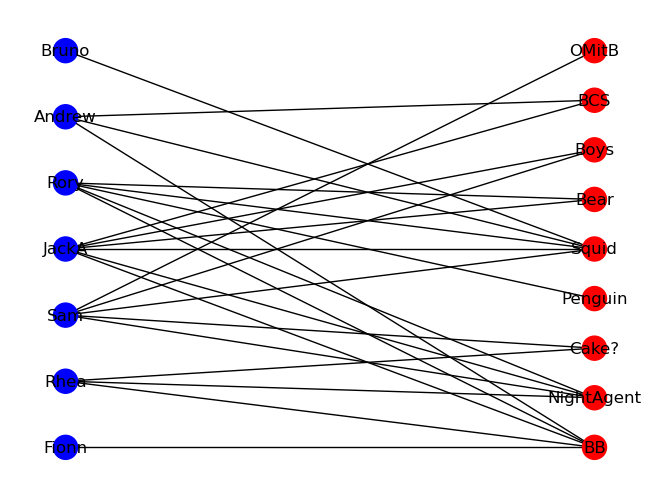

In [11]:
nx.draw(G7, node_color=G7_colours, pos=positions, with_labels=True)

## Adjacency Matrices 

We know the adjacency matrix $A$ of a bipartite graph $G$, with respect to a suitable ordering/permutation of the nodes
($V_1$ first, then $V_2$), has the form of a $2 \times 2$-block matrix,
$$
  A = \left( \begin{array}{cc} 0 & C \\ C^T & 0 \end{array} \right)
$$
where the blocks on the diagonal consist entirely of zeros, as there are no edges between nodes belonging to the same part.

However, without the right ordering, we don't see this nice structure..

Let's look at the adjacency matrix for $G_7$:

In [12]:
A = nx.adjacency_matrix(G7).toarray()
print(A)

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0]]


Here is one way to get a version of the graph with a "nice" ordering:

In [13]:
H=nx.Graph()
H.add_nodes_from(Actors) # first add ther Actor nodes
H.add_nodes_from(Foci)   # then the Foci nodes

Check the order:

In [14]:
print(H.nodes())

['Fionn', 'Rhea', 'Sam', 'JackA', 'Rory', 'Andrew', 'Bruno', 'BCS', 'BB', 'NightAgent', 'Boys', 'Cake?', 'OMitB', 'Bear', 'Penguin', 'Squid']


Then copy the edges from $G_7$

In [15]:
H.add_edges_from(G7.edges())     # Now add the edges

Let's check the adjacency matrix for $H$

In [16]:
A = nx.adjacency_matrix(H).toarray()  # matrix  for H
print(A)

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]]


### The Biadjacency Matrix

Bipartite graphs have a special matrix representation called the **Biadjacency Matrix**. 
If $|V_1|=r$ and $|V_2|=s$, then it is a $r \times s$ matrix, $B$, where $b_{ij}=1$  if there is an edge between Node $i$ in $V_1$ and Node $j$ in $V_2$. 

We can compute it as follows:

In [17]:
B = nx.bipartite.biadjacency_matrix(H, Actors, Foci).toarray()
print(B)

[[0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0]
 [0 0 1 1 1 1 0 0 1]
 [1 1 1 1 0 0 1 0 1]
 [0 1 1 0 0 0 1 1 1]
 [1 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1]]


## Projections

We learned just a while ago that the adjacency matrix of the projection of a bipartite graph $G$ is related the top-left, or bottom-right, non-zero block of $A^2$

In [18]:
print(A@A)

[[1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 3 2 2 2 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 5 3 2 1 1 0 0 0 0 0 0 0 0 0]
 [1 2 3 6 4 3 1 0 0 0 0 0 0 0 0 0]
 [1 2 2 4 5 2 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 3 2 3 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 2 1 1 0 0 1 0 2]
 [0 0 0 0 0 0 0 2 5 3 1 1 0 2 1 3]
 [0 0 0 0 0 0 0 1 3 4 2 2 1 2 1 3]
 [0 0 0 0 0 0 0 1 1 2 2 1 1 1 0 2]
 [0 0 0 0 0 0 0 0 1 2 1 2 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 2 2 1 0 0 2 1 2]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 2 3 3 2 1 1 2 1 5]]


However, we can also get these blocks from the Biadjacency matrix, $B$. The top left is $BB^T$, and bottom right is $B^TB$:

In [19]:
C = B@B.T
print(C)

[[1 1 0 1 1 1 0]
 [1 3 2 2 2 1 0]
 [0 2 5 3 2 1 1]
 [1 2 3 6 4 3 1]
 [1 2 2 4 5 2 1]
 [1 1 1 3 2 3 1]
 [0 0 1 1 1 1 1]]


However, this is not an adjacency matrix of a (simple) graph:

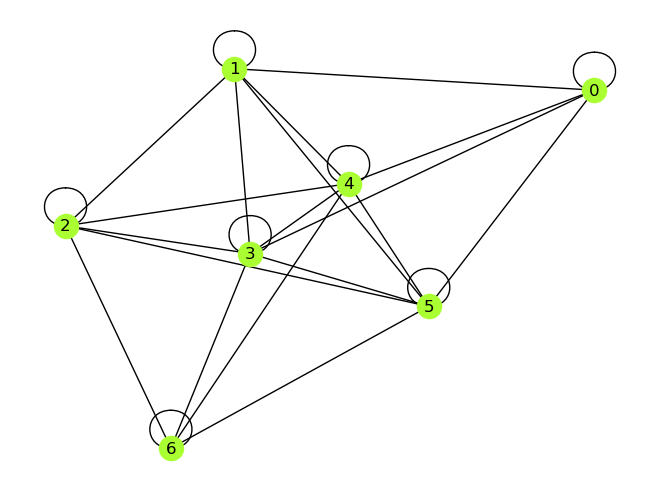

In [20]:
G7_1 = nx.from_numpy_array(C)
nx.draw(G7_1, **opts)    

But we can convert it to one:

In [21]:
C[C>0]=1 # set everything to 0 or 1
print(C)

[[1 1 0 1 1 1 0]
 [1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1]]


In [22]:
np.fill_diagonal(C,0)
print(C)

[[0 1 0 1 1 1 0]
 [1 0 1 1 1 1 0]
 [0 1 0 1 1 1 1]
 [1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1]
 [1 1 1 1 1 0 1]
 [0 0 1 1 1 1 0]]


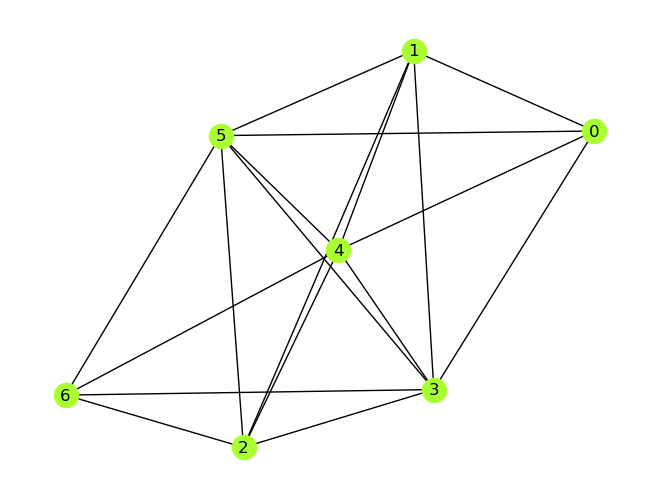

In [23]:
G7_2 = nx.from_numpy_array(C)
nx.draw(G7_2, **opts) 

r we could have used the `networkx` function `projected_graph` (taking input a bipartite graph and one of the two sets of vertices) does this for us:

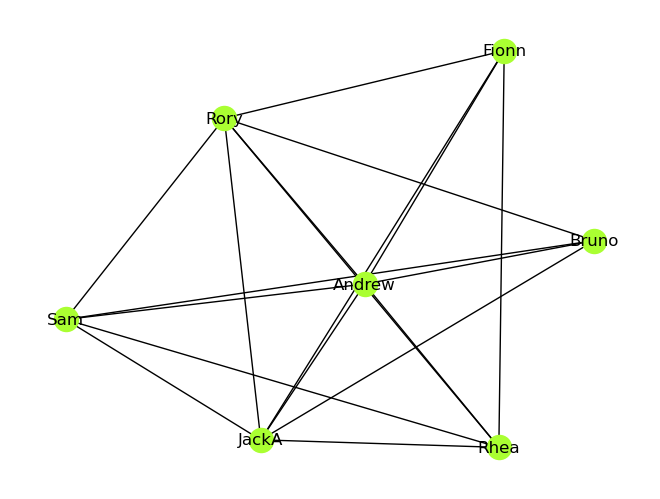

In [24]:
XX = nx.projected_graph(H, Actors)
nx.draw(XX, **opts)

<div class="alert alert-block alert-info">Finished here Thursday</div>